In [ ]:
# !pip install autocorrect
# !pip install nltk

In [3]:
from bs4 import BeautifulSoup
import re
import requests
from urllib.request import urlopen
import time

In [4]:
# extracting reviews using web-scraping.

j=1
textyelp=[]
pages=[]
link = 'https://www.trustpilot.com/review/movoto.com?page='

while True:
    
    res = requests.get(link+str(j))
    soup = BeautifulSoup(res.text,"html.parser")    
    page_num = soup.find_all('a', { "class" : "pagination-page active"})[0].get('data-page-number')
    
    if page_num not in pages:
        
        print('page num: ', page_num)
        reviews = soup.select('p[class*="review-content__text"]')
        
        for i in range(len(reviews)):
            textyelp.append(reviews[i].text)
        
        pages.append(page_num)
        j += 1
    else:
        print('thats all the comments I could find!')
        break


page num:  1
page num:  2
page num:  3
page num:  4
page num:  5
page num:  6
page num:  7
page num:  8
page num:  9
page num:  10
thats all the comments I could find!


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from wordcloud import WordCloud, STOPWORDS


import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from autocorrect import spell

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Michael
[nltk_data]     Ittiachan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Michael
[nltk_data]     Ittiachan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Michael
[nltk_data]     Ittiachan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


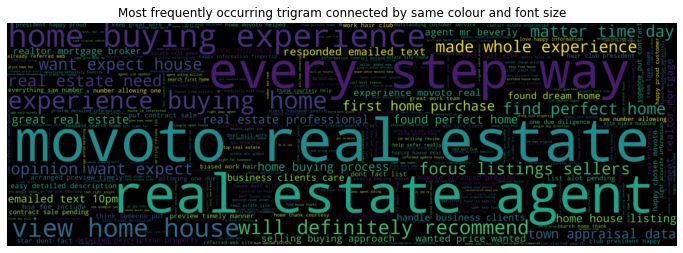

In [6]:
WNL = nltk.WordNetLemmatizer()

# Lowercase and tokenize
text = ''.join(textyelp).lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

#set the stopwords list
stopwords_wc = set(STOPWORDS)
text_content = [word for word in text_content if word not in stopwords_wc]

# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.trigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# print (words_freq[:100])

#Generating wordcloud and saving as jpg image
import matplotlib.pyplot as plt
plt.figure( figsize=(12,12))
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 3000
WC_max_words = 300
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords_wc)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring trigram connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear',cmap = 'Wistia')
plt.axis("off")
plt.show()

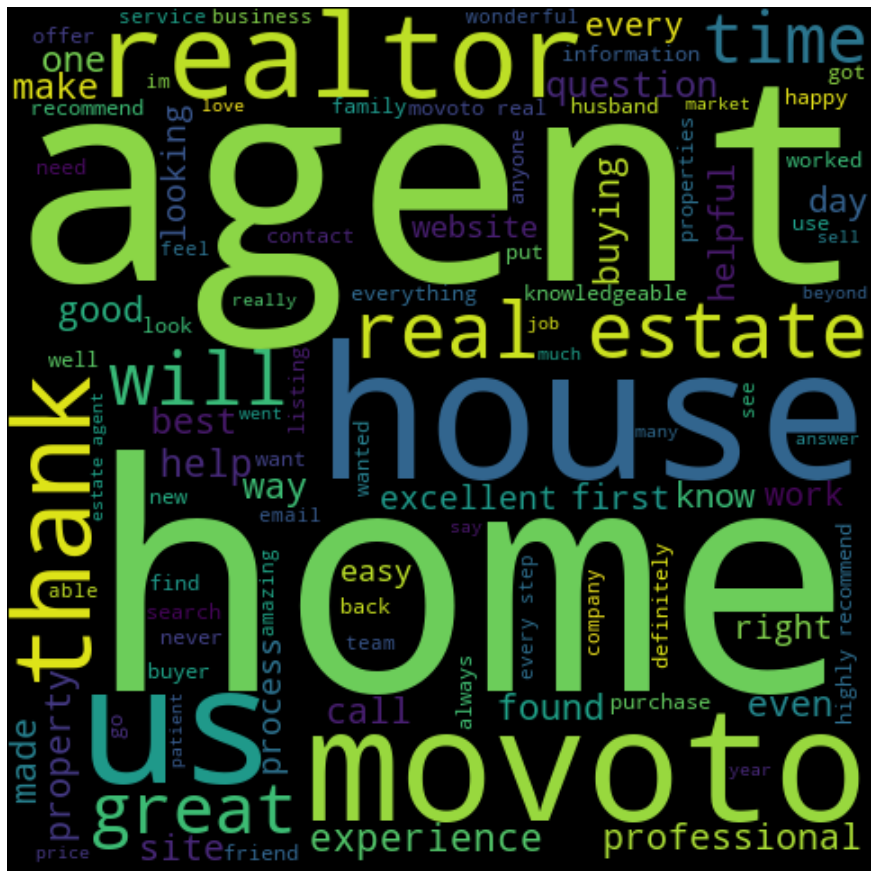

In [7]:
import matplotlib.pyplot as plt
plt.figure( figsize=(12,12))
wordcloud = WordCloud(background_color='black' , max_words= 100 ,width=480, height=480).generate(text)
plt.imshow(wordcloud, interpolation="bilinear" ,cmap = 'Wistia',aspect='auto',)
plt.axis('off')
plt.tight_layout(pad=0)
# plt.savefig('CitrixIssueF1.png',  bbox_inches='tight')
plt.show()